## Machine Learning Project Zindi Air Polution

.env set up 
pyenv local 3.11.3
python -m venv .venv
source .venv/bin/activate
pip install --upgrade pip
pip install 
altair==5.0.1
jupyterlab==3.6.3
ipywidgets==8.0.6
matplotlib==3.7.1
seaborn==0.12.2
numpy==1.24.3
pandas==2.0.1
jupyterlab-dash==0.1.0a3
scikit-learn==1.2.2
statsmodels==0.13.5
pytest==7.3.1


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
test =  pd.read_csv('data/test.csv')

### Check for Duplicates   

In [3]:
n_dub_values = test.duplicated().sum()

is_unique_col = len(test.columns) == len(set(test.columns))

is_unique_col, n_dub_values

# No duplicates in rows or cols

(True, 0)

### Check for Missing values 

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


n_cols = len(test.columns) #77
n_raw_missing = test.isnull().sum().sum() # 215137

null_count = test.isnull().sum()

null_count

Place_ID X Date                                            0
Date                                                       0
Place_ID                                                   0
precipitable_water_entire_atmosphere                       0
relative_humidity_2m_above_ground                          0
specific_humidity_2m_above_ground                          0
temperature_2m_above_ground                                0
u_component_of_wind_10m_above_ground                       0
v_component_of_wind_10m_above_ground                       0
L3_NO2_NO2_column_number_density                        1327
L3_NO2_NO2_slant_column_number_density                  1327
L3_NO2_absorbing_aerosol_index                          1327
L3_NO2_cloud_fraction                                   1327
L3_NO2_sensor_altitude                                  1327
L3_NO2_sensor_azimuth_angle                             1327
L3_NO2_sensor_zenith_angle                              1327
L3_NO2_solar_azimuth_ang

In [5]:
!pip install missingno
import missingno as msno


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


''

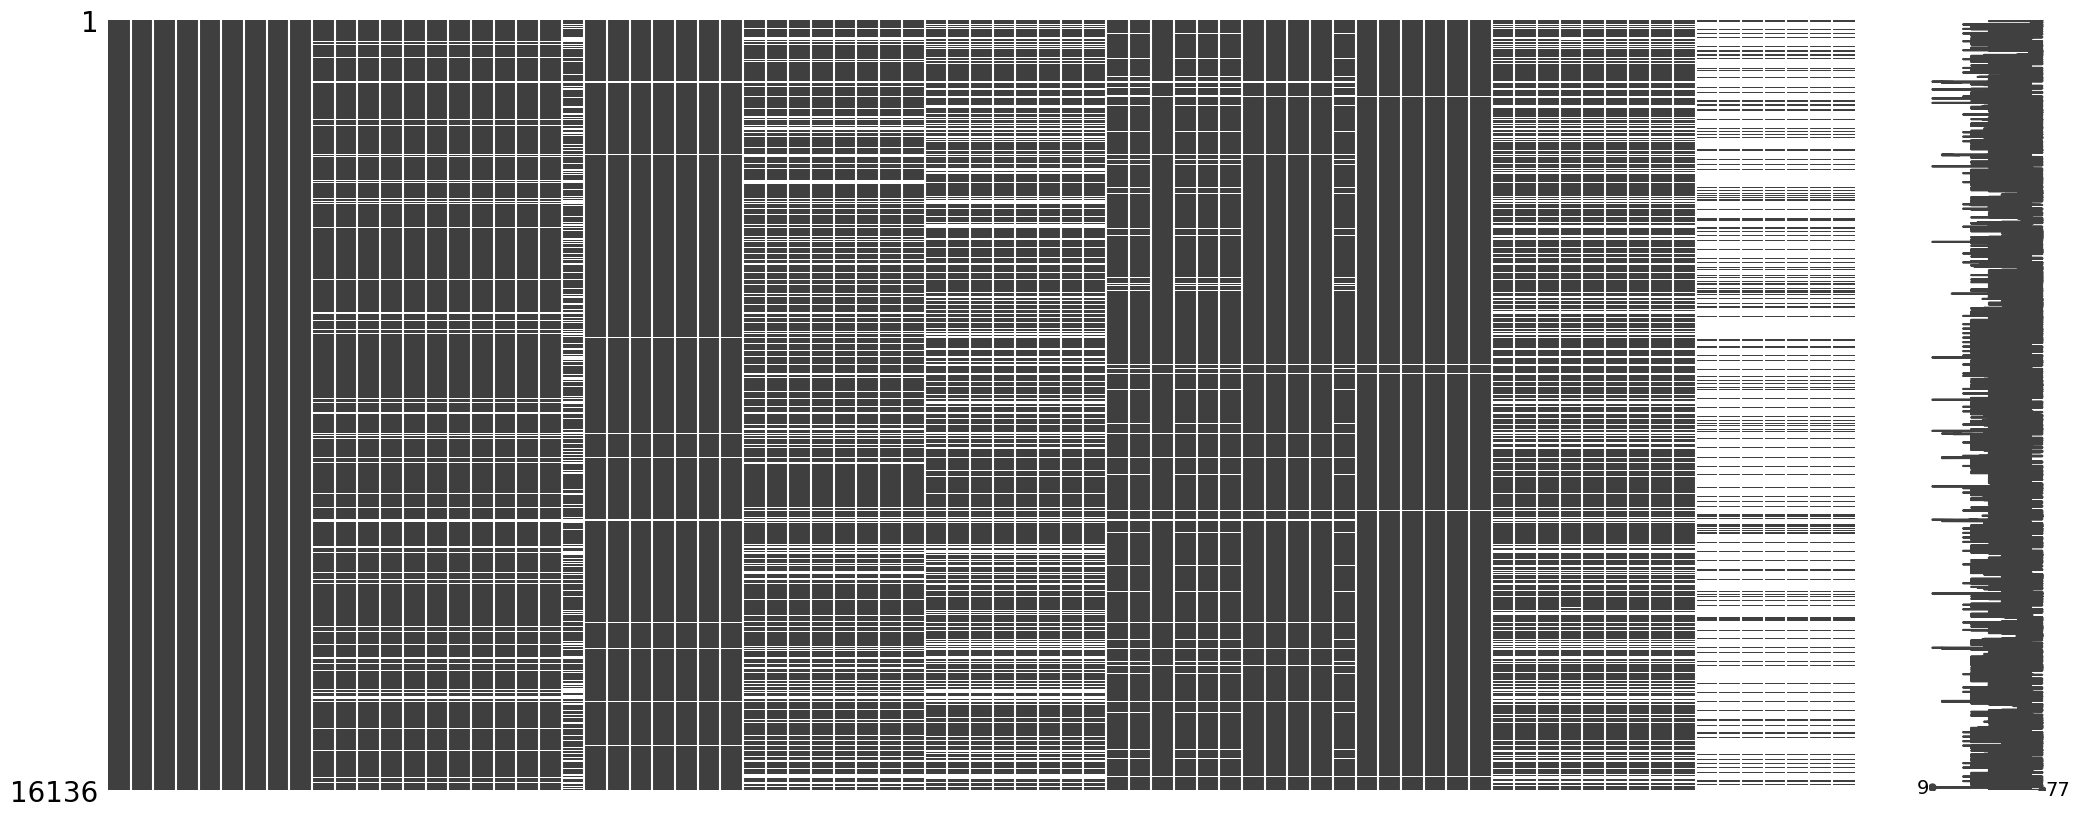

In [6]:
msno.matrix(test)  
;

#### Check for Zero Values

In [7]:
zero_count_raw = test.eq(0).sum()
zero_count_raw



Place_ID X Date                                           0
Date                                                      0
Place_ID                                                  0
precipitable_water_entire_atmosphere                      0
relative_humidity_2m_above_ground                         0
specific_humidity_2m_above_ground                         0
temperature_2m_above_ground                               0
u_component_of_wind_10m_above_ground                      0
v_component_of_wind_10m_above_ground                      0
L3_NO2_NO2_column_number_density                       1371
L3_NO2_NO2_slant_column_number_density                 1371
L3_NO2_absorbing_aerosol_index                         1371
L3_NO2_cloud_fraction                                  1454
L3_NO2_sensor_altitude                                 1371
L3_NO2_sensor_azimuth_angle                            1371
L3_NO2_sensor_zenith_angle                             1371
L3_NO2_solar_azimuth_angle              

In [8]:
# Brief check if Null and Zero values are equal 
zero_count_raw == null_count


Place_ID X Date                                         True
Date                                                    True
Place_ID                                                True
precipitable_water_entire_atmosphere                    True
relative_humidity_2m_above_ground                       True
specific_humidity_2m_above_ground                       True
temperature_2m_above_ground                             True
u_component_of_wind_10m_above_ground                    True
v_component_of_wind_10m_above_ground                    True
L3_NO2_NO2_column_number_density                       False
L3_NO2_NO2_slant_column_number_density                 False
L3_NO2_absorbing_aerosol_index                         False
L3_NO2_cloud_fraction                                  False
L3_NO2_sensor_altitude                                 False
L3_NO2_sensor_azimuth_angle                            False
L3_NO2_sensor_zenith_angle                             False
L3_NO2_solar_azimuth_ang

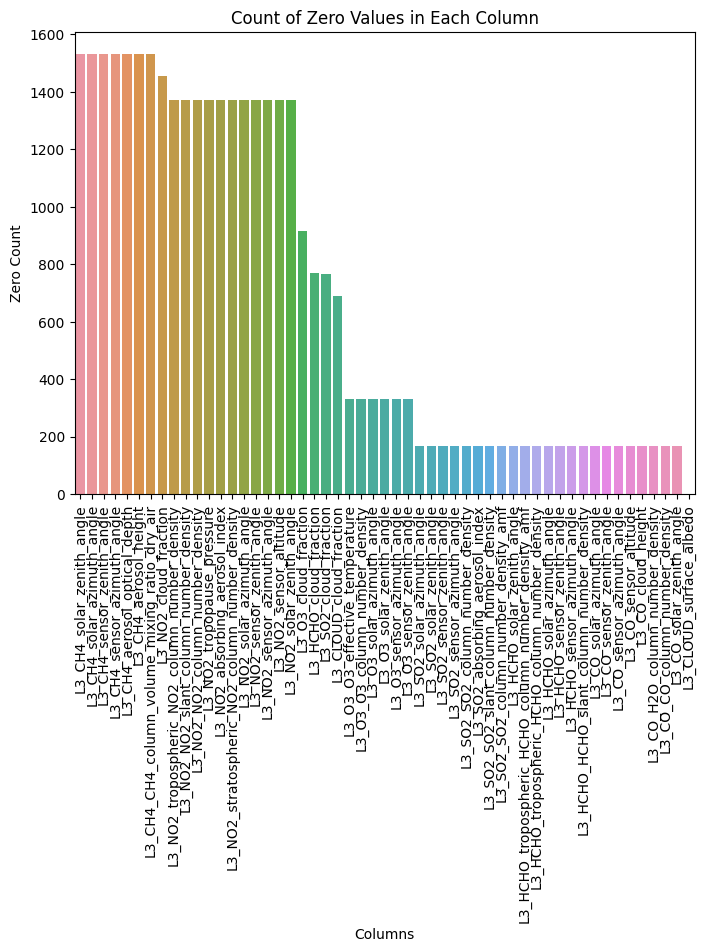

''

In [9]:
# Plot occurrence of values being 0 = Zero

columns_with_zeros = test.columns[test.eq(0).any()]
zero_data = test[columns_with_zeros]
zero_count = zero_data.eq(0).sum()

zero_count = zero_count.sort_values(ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x=zero_count.index, y=zero_count.values)
plt.title('Count of Zero Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Zero Count')
plt.xticks(rotation=90)
plt.show()
;

In [10]:
zero_count.keys()

Index(['L3_CH4_solar_zenith_angle', 'L3_CH4_solar_azimuth_angle',
       'L3_CH4_sensor_zenith_angle', 'L3_CH4_sensor_azimuth_angle',
       'L3_CH4_aerosol_optical_depth', 'L3_CH4_aerosol_height',
       'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
       'L3_NO2_cloud_fraction',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_NO2_column_number_density', 'L3_NO2_tropopause_pressure',
       'L3_NO2_absorbing_aerosol_index',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_solar_azimuth_angle', 'L3_NO2_sensor_zenith_angle',
       'L3_NO2_sensor_azimuth_angle', 'L3_NO2_sensor_altitude',
       'L3_NO2_solar_zenith_angle', 'L3_O3_cloud_fraction',
       'L3_HCHO_cloud_fraction', 'L3_SO2_cloud_fraction',
       'L3_CLOUD_cloud_fraction', 'L3_O3_O3_effective_temperature',
       'L3_O3_O3_column_number_density', 'L3_O3_solar_azimuth_angle',
       'L3_O3_solar_zenith_angle', 'L3_O3_sensor_az

##### Columns Where a Value of 0 Can Be Meaningful:




##### Columns Where a Value of 0 Makes No Sense:





Todo for Imputation strategy: 

- Find out which values can be 0, for cols that can not be 0, delete 0, so it's a missing value 

- find out distibustion for each col that needs to be tackeld 

- 

- for each col come up with a strategy 

Possible inputation startegys

1. **Mean, Median, or Mode Imputation**:
   - **When to Use**: Suitable for numerical features with missing values, especially when the distribution of data is roughly symmetrical. Use the mean for normally distributed data, median for skewed data, and mode for categorical data.

2. **Forward Fill and Backward Fill (FFill and BFill)**:
   - **When to Use**: Appropriate for time series data where values are expected to remain relatively constant between consecutive time points.

3. **Linear Interpolation**:
   - **When to Use**: Best suited for time series or ordered data, where values are expected to vary linearly between known data points.

4. **K-Nearest Neighbors (KNN) Imputation**:
   - **When to Use**: Effective when the data points with similar attributes (features) are likely to have similar values, making it suitable for numerical or categorical data with a significant correlation between attributes.

5. **Multiple Imputation**:
   - **When to Use**: Recommended for complex statistical analyses, such as regression or modeling, when imputation uncertainty needs to be taken into account.

6. **Regression Imputation**:
   - **When to Use**: Suitable for scenarios where a variable with missing values can be predicted using other variables. It's commonly used in predictive modeling tasks.

7. **Random Forest Imputation**:
   - **When to Use**: Appropriate for datasets with complex relationships and interactions between features. Random forests can capture nonlinear relationships.

8. **Principal Component Analysis (PCA) Imputation**:
   - **When to Use**: Useful when the data has high-dimensional multivariate structure and strong correlations. It's often applied in scenarios where dimensionality reduction is required.

9. **Deep Learning Imputation**:
   - **When to Use**: Beneficial for handling large and complex datasets with nonlinear dependencies between variables. Deep learning can capture intricate patterns in the data.

10. **Domain-Specific Imputation**:
    - **When to Use**: When domain knowledge provides insights into the missing data patterns. Custom imputation strategies can be designed based on an understanding of the data and its context.

11. **Listwise Deletion**:
    - **When to Use**: When the number of missing values is small and not expected to significantly impact the analysis. However, be cautious about potential bias and loss of information.

12. **Dummies or Flags**:
    - **When to Use**: Create binary indicator variables for missing values when the missingness pattern itself holds valuable information and should be explicitly included in the analysis. Commonly used for survey or questionnaire data.

Selecting the most appropriate imputation strategy depends on the specific characteristics of your dataset, the nature of the missing values, and the goals of your analysis. It's essential to consider both the statistical properties of the data and the domain knowledge to make an informed choice. Additionally, sensitivity analysis, where different imputation methods are tested and their impact on results assessed, can help in evaluating imputation strategies.

In [15]:
lst_zero_is_cool = [
'L3_AER_AI_absorbing_aerosol_index',
'L3_AER_AI_sensor_azimuth_angle',
'L3_AER_AI_solar_azimuth_angle',
'L3_CLOUD_cloud_fraction',
'L3_CLOUD_sensor_azimuth_angle',
'L3_CLOUD_solar_azimuth_angle',
'L3_CO_CO_column_number_density',
'L3_CO_H2O_column_number_density',
'L3_CO_cloud_height',
'L3_CO_sensor_azimuth_angle',
'L3_CO_solar_azimuth_angle',
'L3_HCHO_tropospheric_HCHO_column_number_density',
'L3_HCHO_HCHO_slant_column_number_density',
'L3_HCHO_cloud_fraction',
'L3_HCHO_sensor_azimuth_angle',
'L3_HCHO_solar_azimuth_angle',
'L3_NO2_NO2_column_number_density',
'L3_NO2_tropospheric_NO2_column_number_density',
'L3_NO2_absorbing_aerosol_index',
'L3_NO2_cloud_fraction',
'L3_NO2_sensor_azimuth_angle',
'L3_NO2_solar_azimuth_angle',
'L3_O3_cloud_fraction',
'L3_O3_sensor_azimuth_angle',
'L3_O3_solar_azimuth_angle',
'L3_SO2_SO2_column_number_density',
'L3_SO2_SO2_slant_column_number_density',
'L3_SO2_absorbing_aerosol_index',
'L3_SO2_cloud_fraction',
'L3_SO2_sensor_azimuth_angle',
'L3_SO2_solar_azimuth_angle',
'L3_CH4_sensor_azimuth_angle',
'L3_CH4_solar_azimuth_angle',
'L3_CH4_CH4_column_volume_mixing_ratio_dry_air', # corrected form error list, was in list w/o .._uncertainty
'temperature_2m_above_ground',
'specific_humidity_2m_above_ground',
'u_component_of_wind_10m_above_ground',
'v_component_of_wind_10m_above_ground',
'precipitable_water_entire_atmosphere',
]

# non existant in real col list: 
#'total_precipitation_surface', not exisiting 
#downward_shortwave_radiation_flux
#'total_cloud_cover_entire_atmosphere',



/Users/hanneswecker/neue_fische/ds-linear-regression/.venv/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(34, 39)

In [27]:
def col_plotter_with_errors (to_plt_col , plt_col = 'blue' , prnt_errors = False, ):
    
    errors = []

    for col_name in to_plt_col: 
        try:
            plt.figure()
            n_bins = int (2*(len(test[col_name])**(1/3))) # n bin according to rice rule: 2 * n^(1/3),
            plt.hist(test[col_name],bins=n_bins, label=col_name,color= plt_col)
            plt.title(f'Histogram for {col_name}')
        except Exception as e:
                errors.append(f"Error processing item {col_name}: {e}")
                continue  # Continue the loop to the next iteration


    if errors:
        print("Errors encountered:")
        for error in errors_zero_cool:
            print(error)
    else:
        print("No errors encountered.")

    if prnt_errors == True:
         return errors



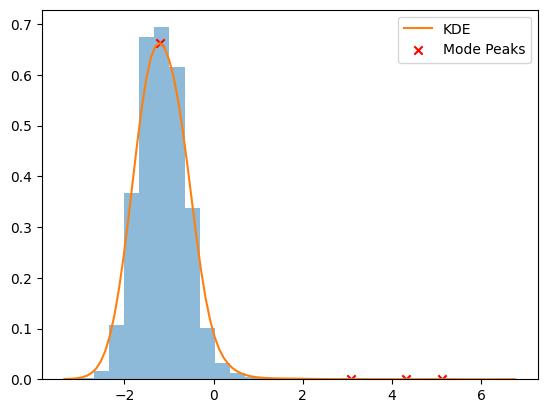

The 'L3_AER_AI_absorbing_aerosol_index' column has 4 modes and may be multi-modal.


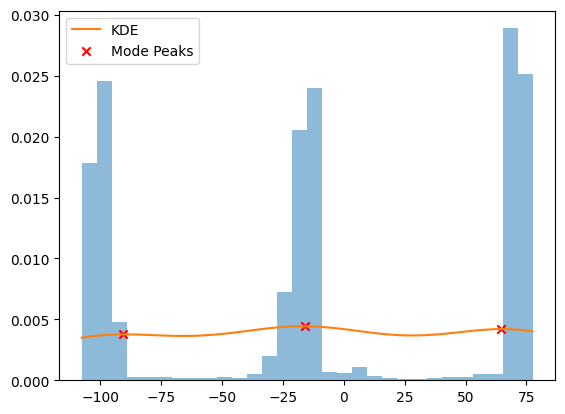

The 'L3_AER_AI_sensor_azimuth_angle' column has 3 modes and may be multi-modal.


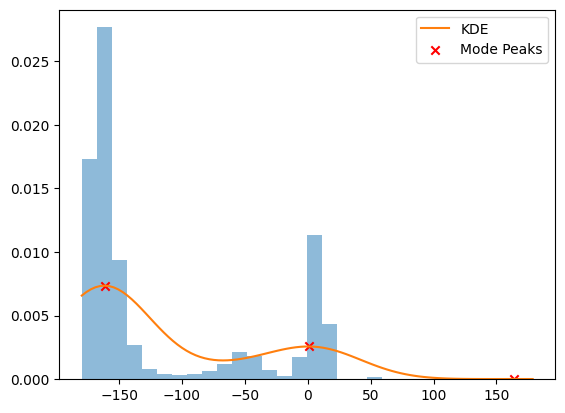

The 'L3_AER_AI_solar_azimuth_angle' column has 3 modes and may be multi-modal.


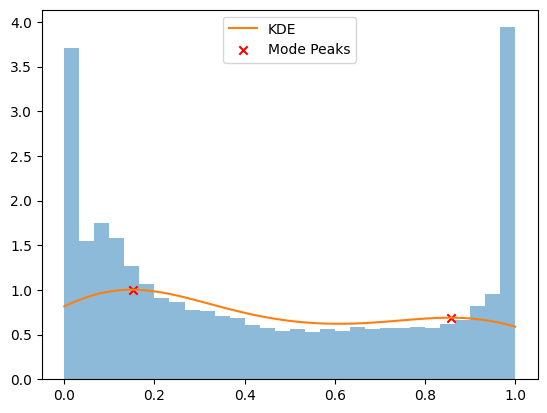

The 'L3_CLOUD_cloud_fraction' column has 2 modes and may be multi-modal.


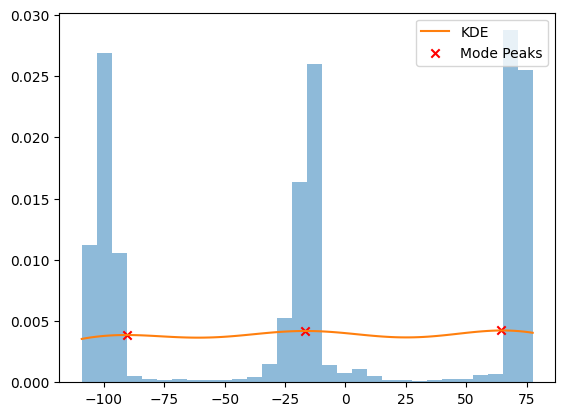

The 'L3_CLOUD_sensor_azimuth_angle' column has 3 modes and may be multi-modal.


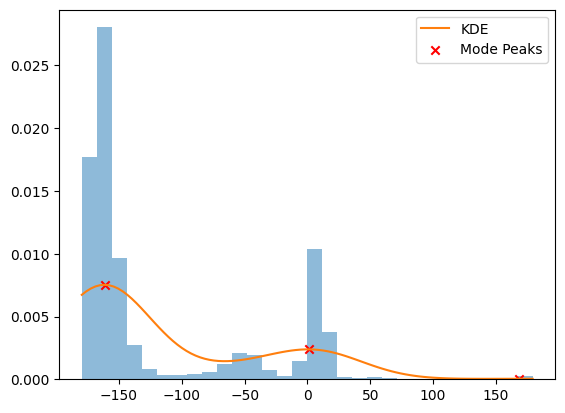

The 'L3_CLOUD_solar_azimuth_angle' column has 3 modes and may be multi-modal.


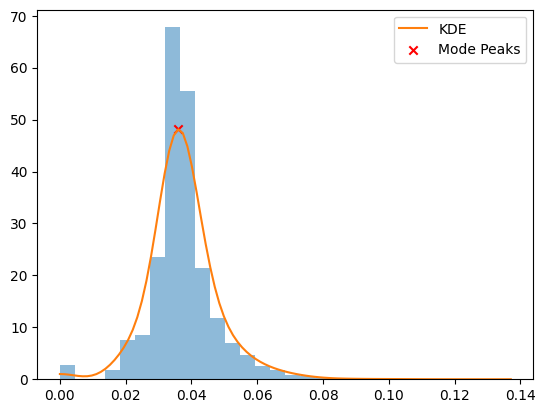

The 'L3_CO_CO_column_number_density' column is unimodal.


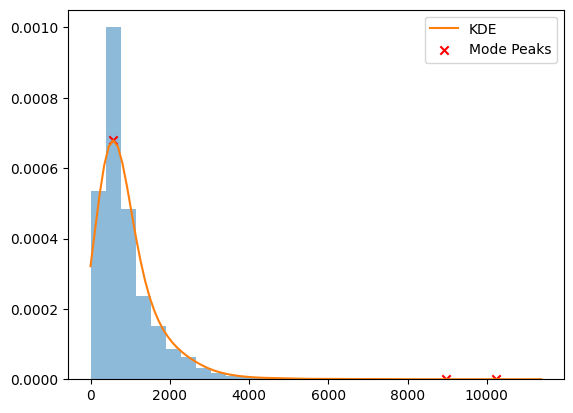

The 'L3_CO_H2O_column_number_density' column has 3 modes and may be multi-modal.


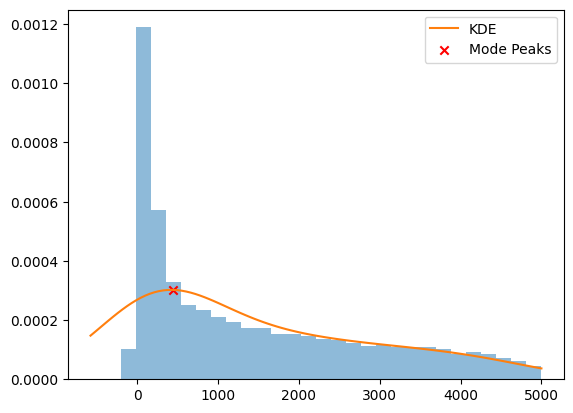

The 'L3_CO_cloud_height' column is unimodal.


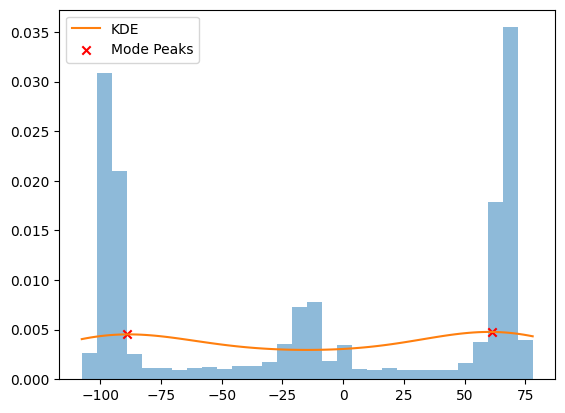

The 'L3_CO_sensor_azimuth_angle' column has 2 modes and may be multi-modal.


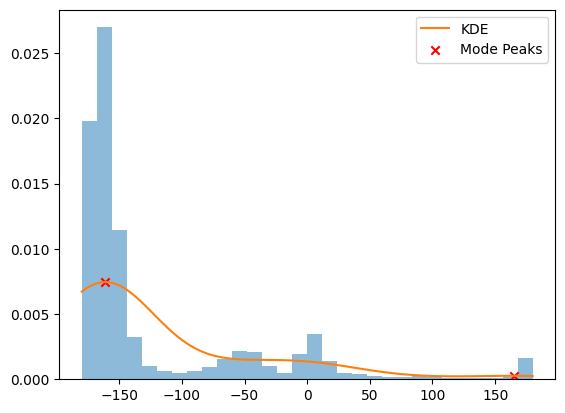

The 'L3_CO_solar_azimuth_angle' column has 2 modes and may be multi-modal.


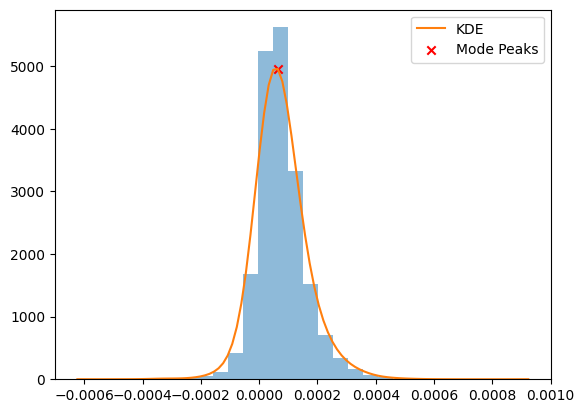

The 'L3_HCHO_tropospheric_HCHO_column_number_density' column is unimodal.


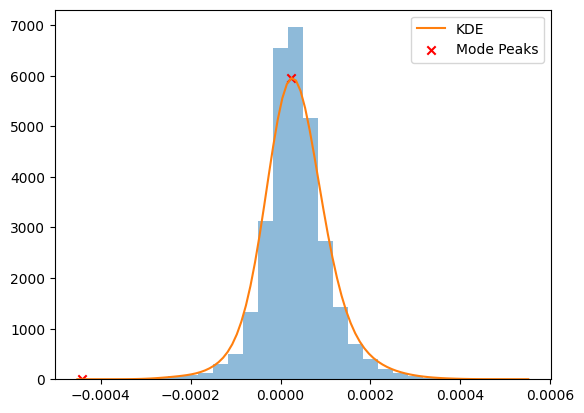

The 'L3_HCHO_HCHO_slant_column_number_density' column has 2 modes and may be multi-modal.


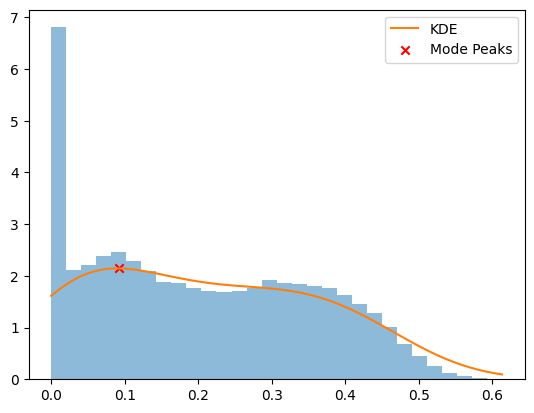

The 'L3_HCHO_cloud_fraction' column is unimodal.


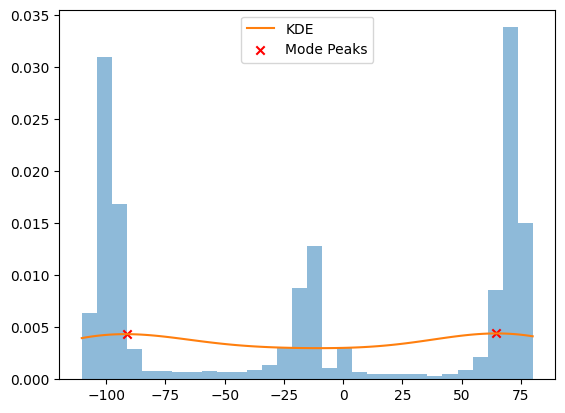

The 'L3_HCHO_sensor_azimuth_angle' column has 2 modes and may be multi-modal.


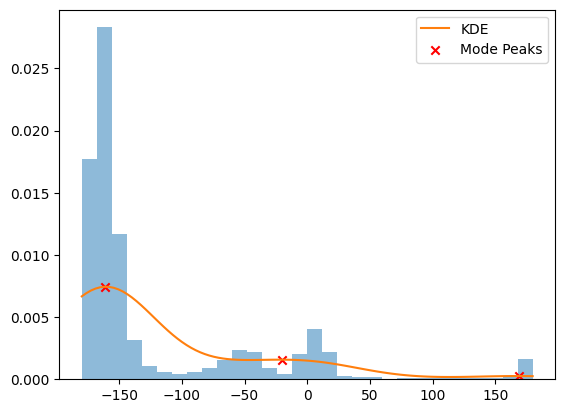

The 'L3_HCHO_solar_azimuth_angle' column has 3 modes and may be multi-modal.


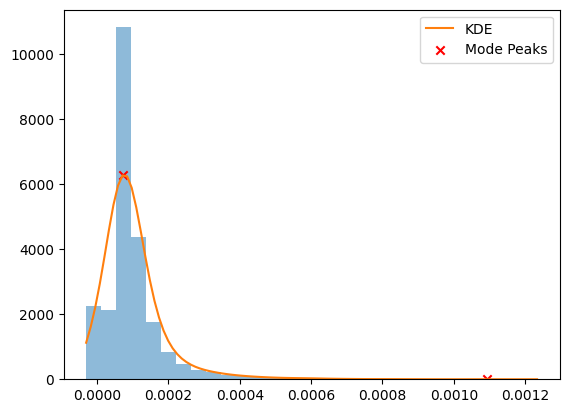

The 'L3_NO2_NO2_column_number_density' column has 2 modes and may be multi-modal.


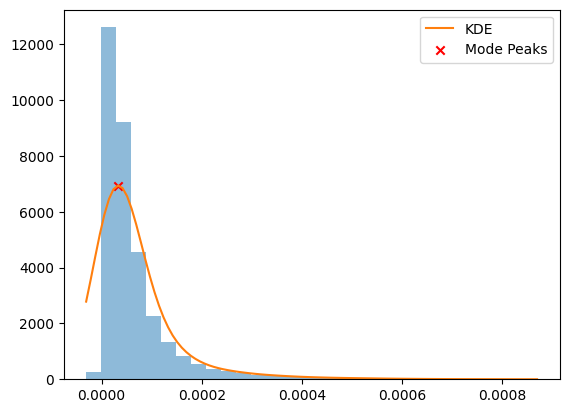

The 'L3_NO2_tropospheric_NO2_column_number_density' column is unimodal.


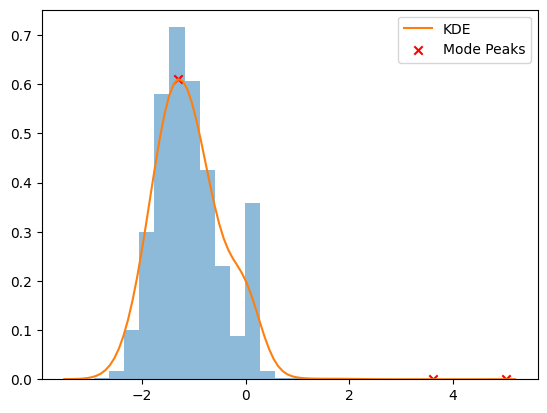

The 'L3_NO2_absorbing_aerosol_index' column has 3 modes and may be multi-modal.


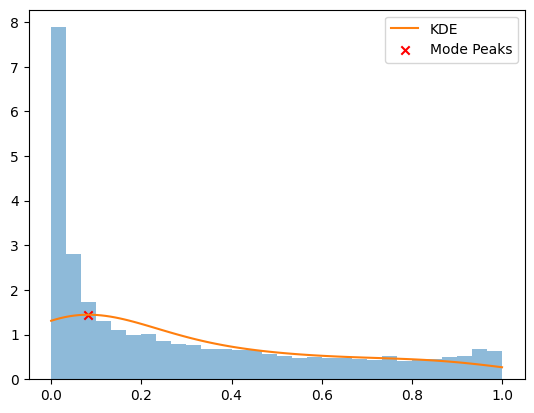

The 'L3_NO2_cloud_fraction' column is unimodal.


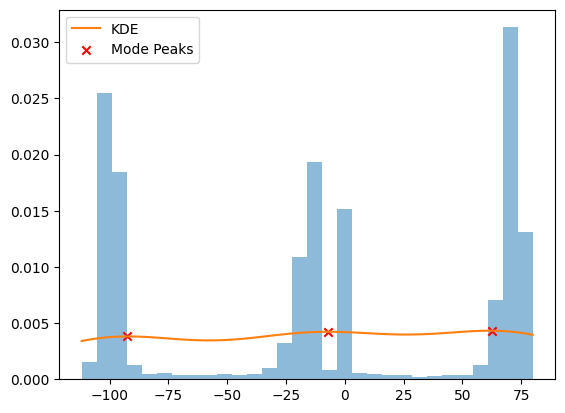

The 'L3_NO2_sensor_azimuth_angle' column has 3 modes and may be multi-modal.


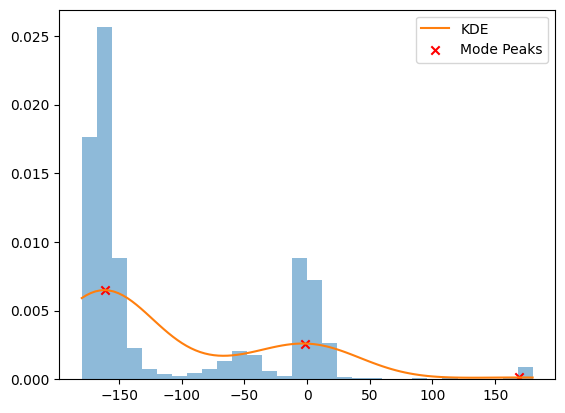

The 'L3_NO2_solar_azimuth_angle' column has 3 modes and may be multi-modal.


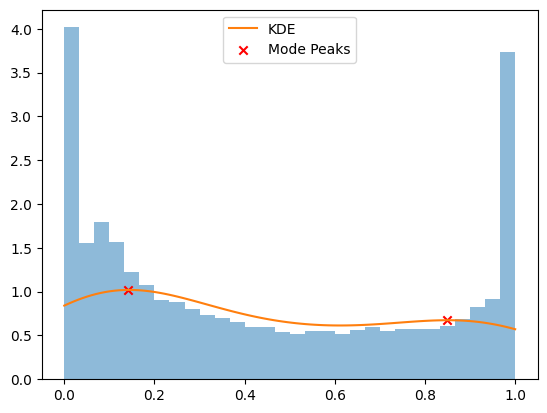

The 'L3_O3_cloud_fraction' column has 2 modes and may be multi-modal.


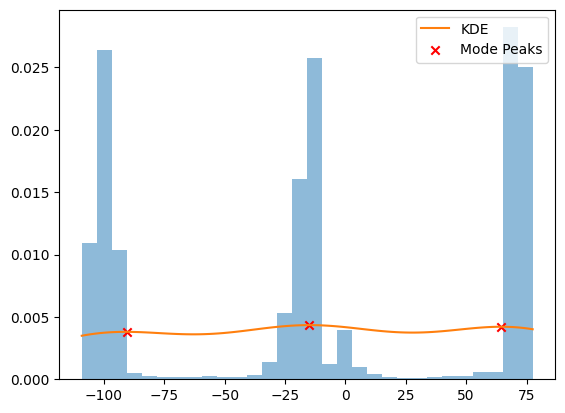

The 'L3_O3_sensor_azimuth_angle' column has 3 modes and may be multi-modal.


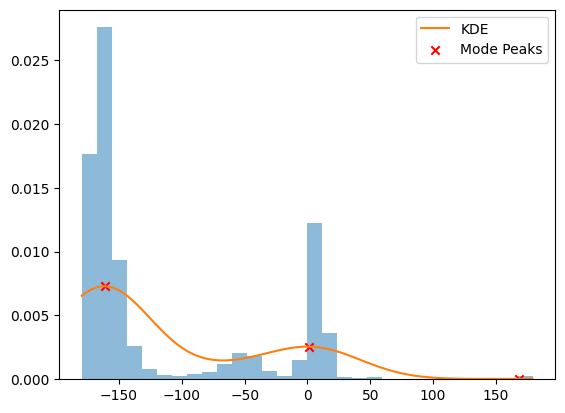

The 'L3_O3_solar_azimuth_angle' column has 3 modes and may be multi-modal.


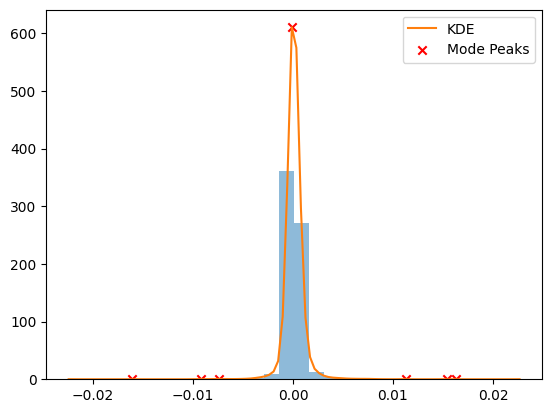

The 'L3_SO2_SO2_column_number_density' column has 7 modes and may be multi-modal.


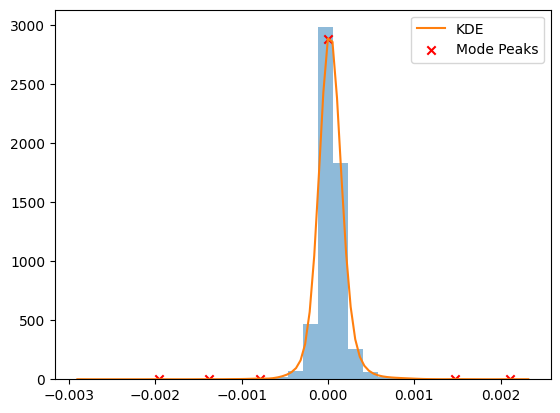

The 'L3_SO2_SO2_slant_column_number_density' column has 6 modes and may be multi-modal.


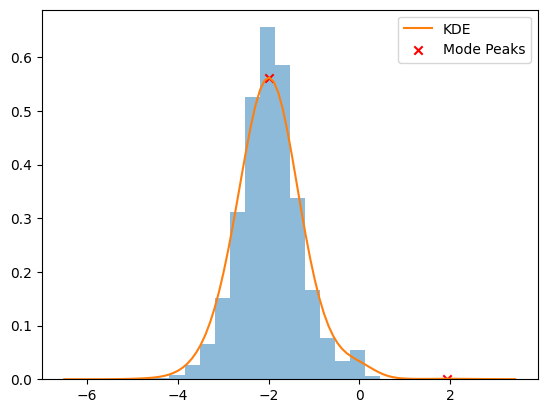

The 'L3_SO2_absorbing_aerosol_index' column has 2 modes and may be multi-modal.


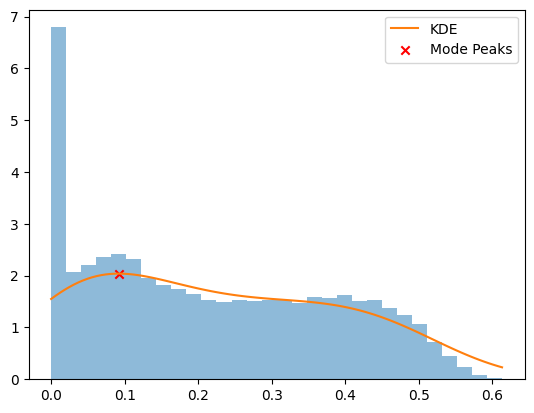

The 'L3_SO2_cloud_fraction' column is unimodal.


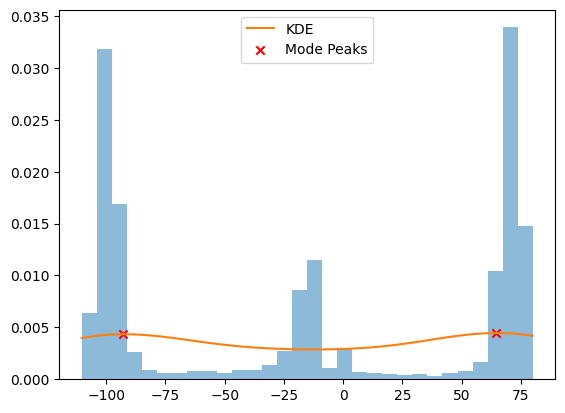

The 'L3_SO2_sensor_azimuth_angle' column has 2 modes and may be multi-modal.


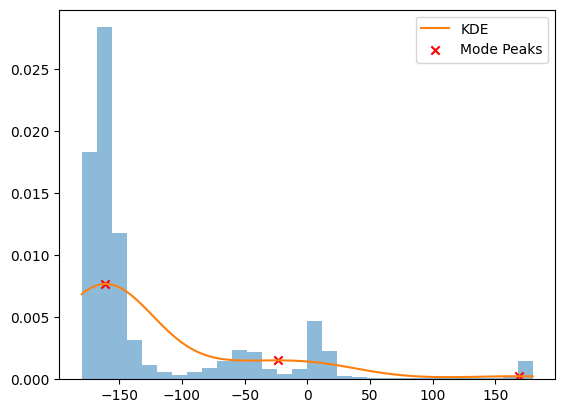

The 'L3_SO2_solar_azimuth_angle' column has 3 modes and may be multi-modal.


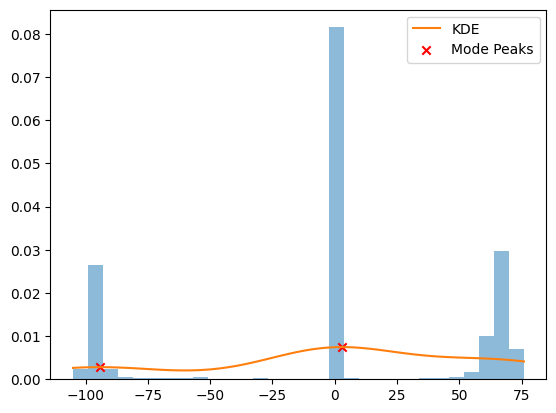

The 'L3_CH4_sensor_azimuth_angle' column has 2 modes and may be multi-modal.


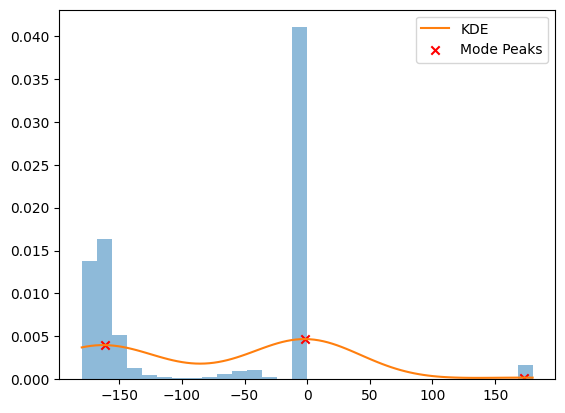

The 'L3_CH4_solar_azimuth_angle' column has 3 modes and may be multi-modal.


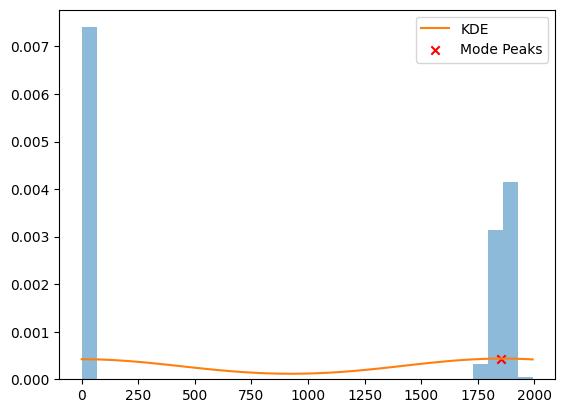

The 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air' column is unimodal.


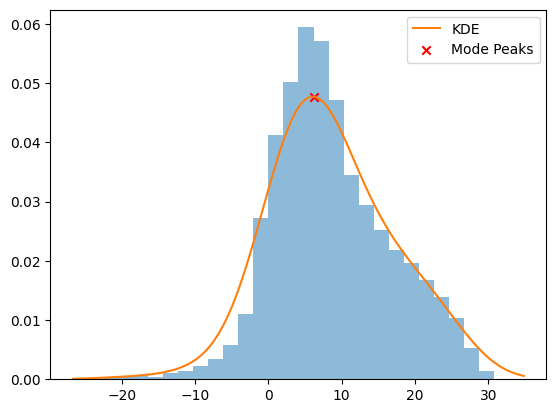

The 'temperature_2m_above_ground' column is unimodal.


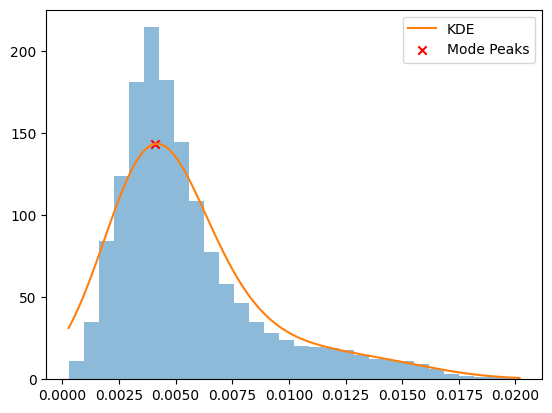

The 'specific_humidity_2m_above_ground' column is unimodal.


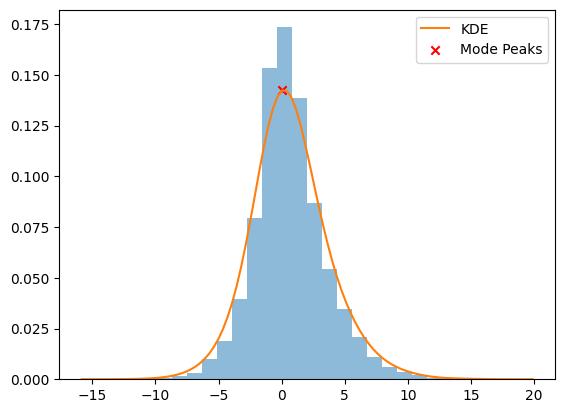

The 'u_component_of_wind_10m_above_ground' column is unimodal.


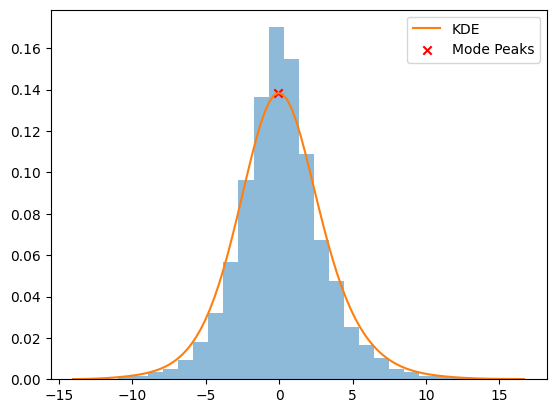

The 'v_component_of_wind_10m_above_ground' column is unimodal.


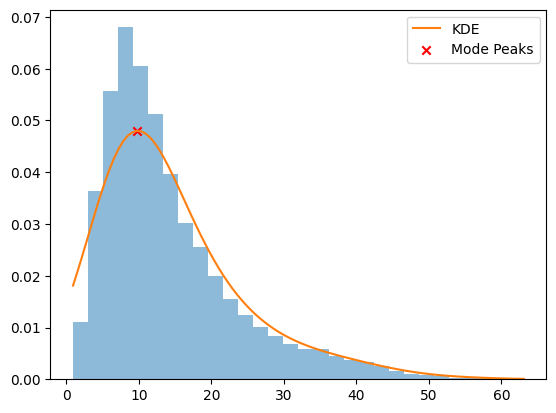

The 'precipitable_water_entire_atmosphere' column is unimodal.


In [124]:
#check if col is unimodal  
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
from scipy.signal import find_peaks
import numpy as np


# Make me a function where plotting can be turned on an off 
unimodals = []

normal_distrubuted_cool_zero = []

for col_name in lst_zero_is_cool: 

    # for now we ignore the Nan values by masking them 
    data = test[col_name]
    mask = ~np.isnan(data)
    temp_cleaned_data = data[mask]   

    kde = stats.gaussian_kde(temp_cleaned_data, bw_method=0.5)



    # Evaluate the KDE on a grid of points
    x = np.linspace(temp_cleaned_data.min(), temp_cleaned_data.max(), 100)
    y = kde(x)

    #Find peaks in the KDE
    peaks, _ = find_peaks(y)

    # Plot the data and the KDE
    plt.hist(temp_cleaned_data, bins=30, density=True, alpha=0.5)
    plt.plot(x, y, label='KDE')
    plt.scatter(x[peaks], y[peaks], color='red', marker='x', label='Mode Peaks')
    plt.legend()
    plt.show()

# Check the number of detected modes
    num_modes = len(peaks)
    if num_modes == 1:
        print(f"The '{col_name}' column is unimodal.")
        unimodals.append(col_name)
    else:
        print(f"The '{col_name}' column has {num_modes} modes and may be multi-modal.")








In [108]:
unimodals

['L3_CO_cloud_height',
 'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
 'specific_humidity_2m_above_ground',
 'precipitable_water_entire_atmosphere']

In [ ]:
# Check if data that is unimodal is normal distrubuted 


    #statistic, p_value = stats.shapiro(test[col_name])
    #statistic, p_value = stats.kstest(test[col_name], 'norm') # so far the best results
    #statistic, p_value = stats.jarque_bera(test[col_name])
    #statistic, p_value = lilliefors(test[col_name])



    #if p_value > alpha:
    #    normal_distrubuted_cool_zero.append(col_name)




#not_nomal_normal_distrubuted_cool_zero = []

#for item in lst_zero_is_cool:
#    if item not in normal_distrubuted_cool_zero:
#        not_nomal_normal_distrubuted_cool_zero.append(item)


#len(not_nomal_normal_distrubuted_cool_zero),len(normal_distrubuted_cool_zero)
    

/var/folders/wp/gjgrnkqd0mq5nfzdmnd4yvl80000gn/T/ipykernel_80079/1006340414.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


No errors encountered.


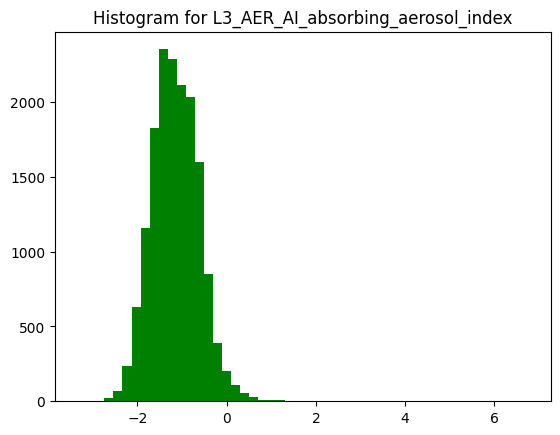

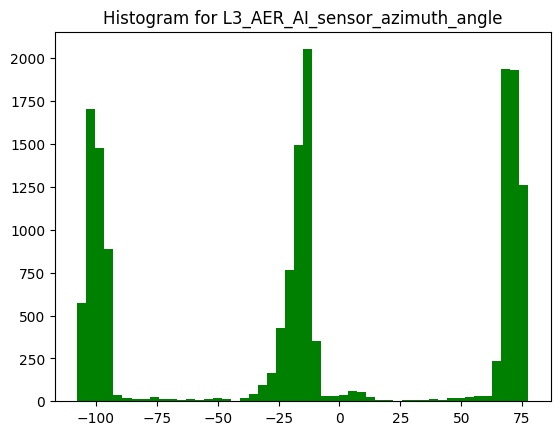

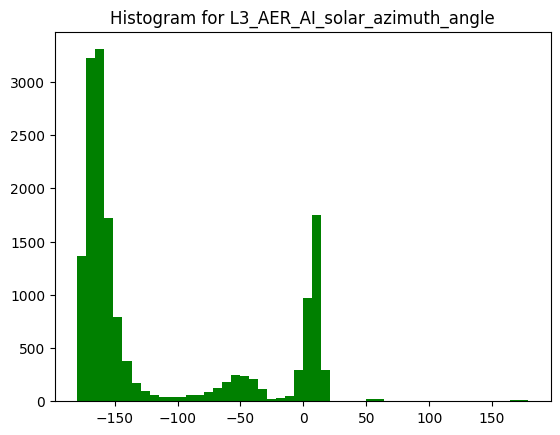

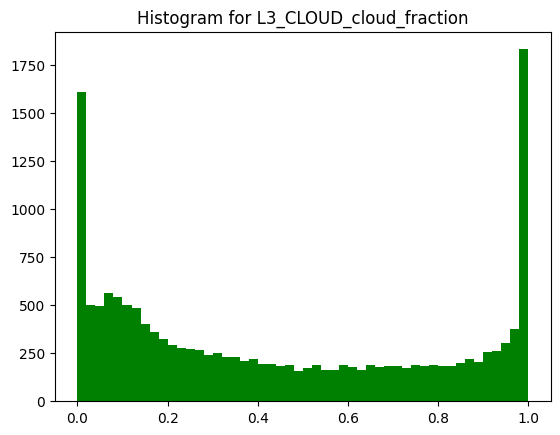

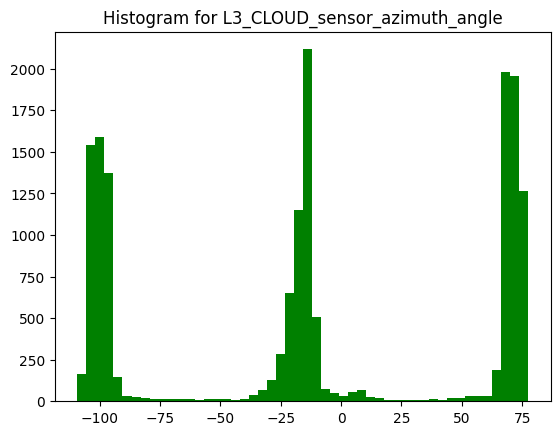

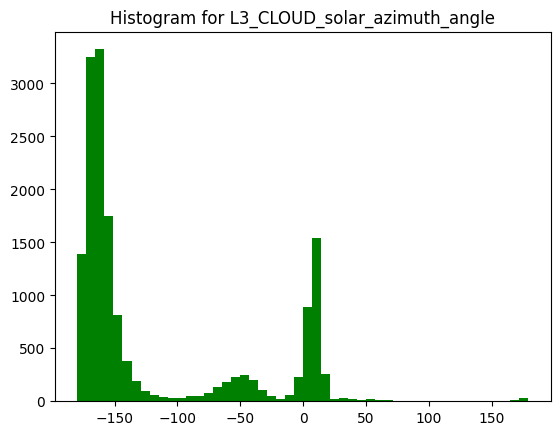

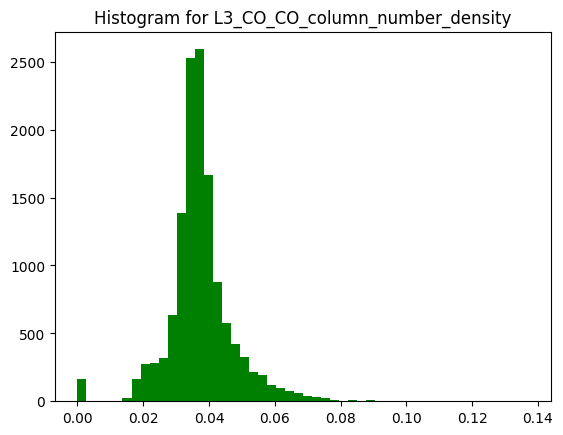

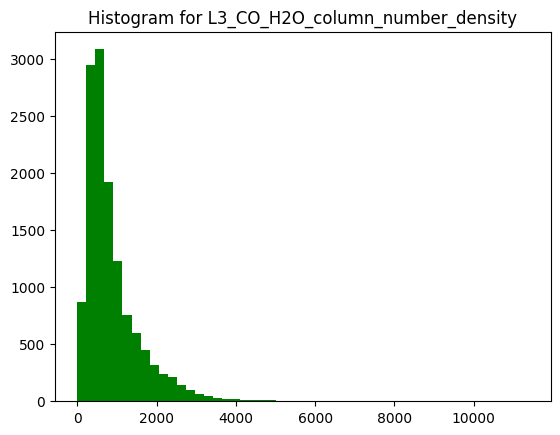

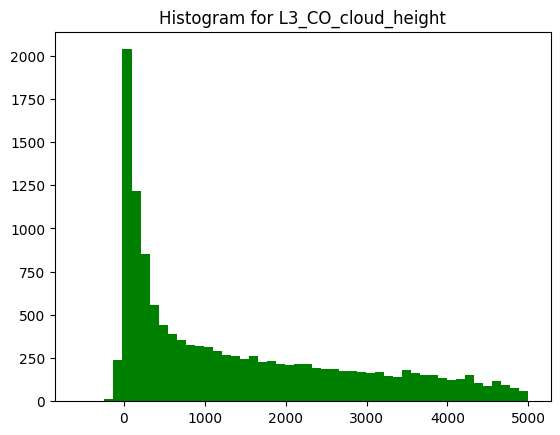

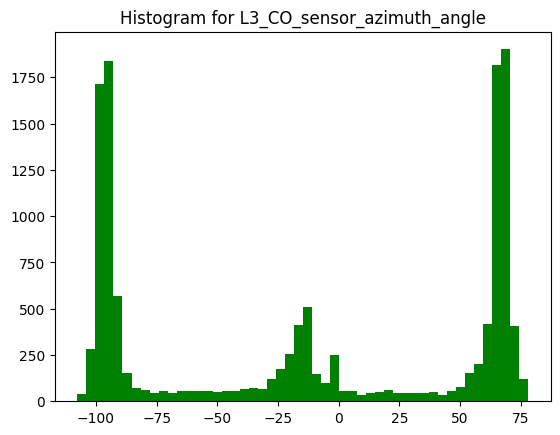

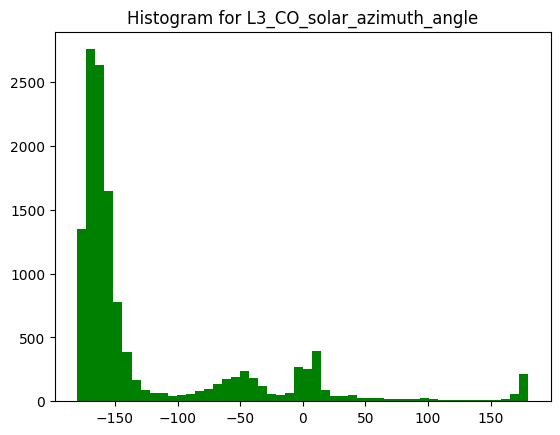

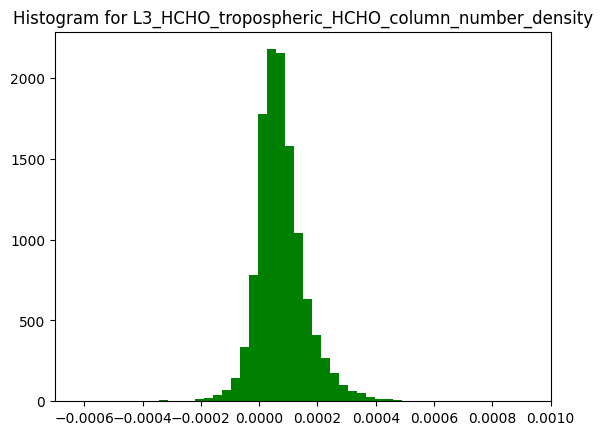

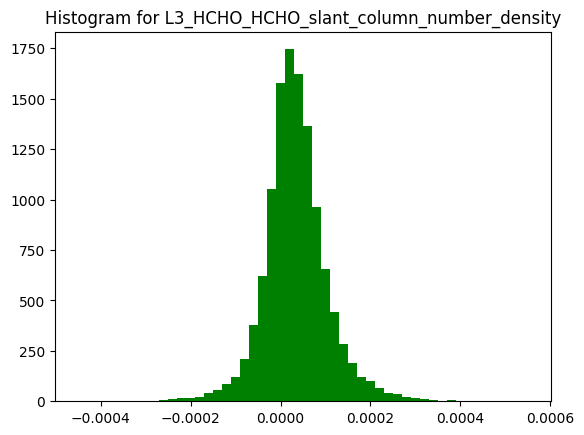

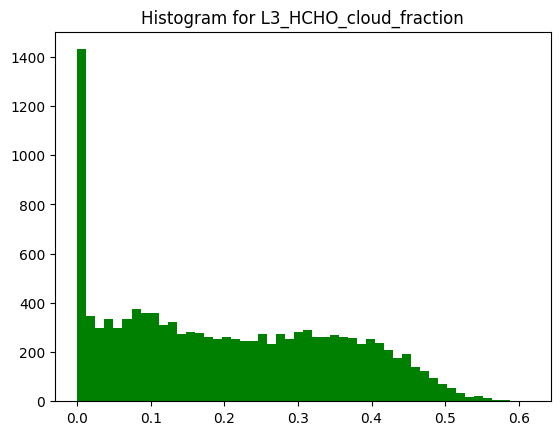

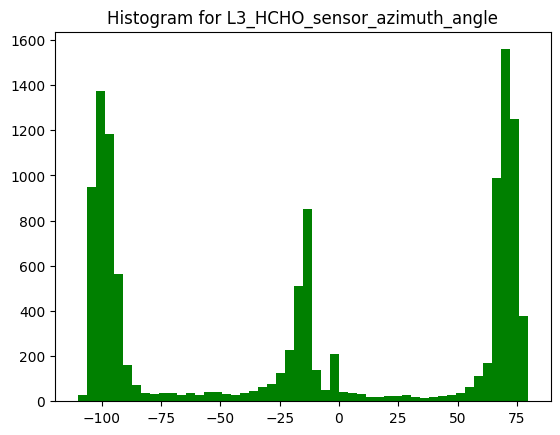

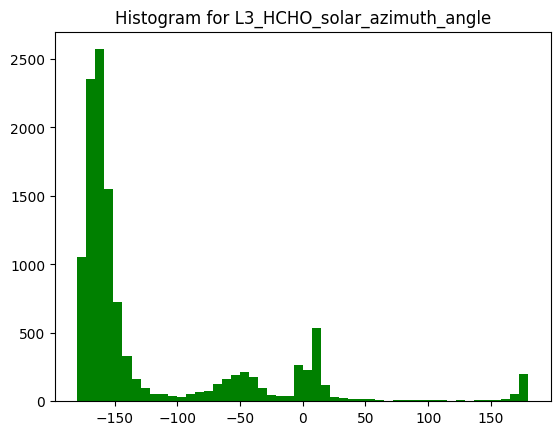

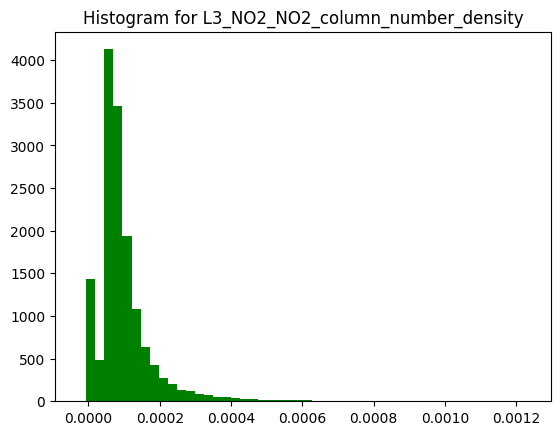

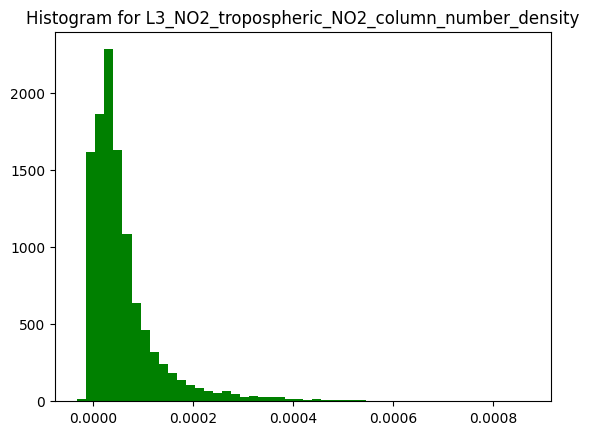

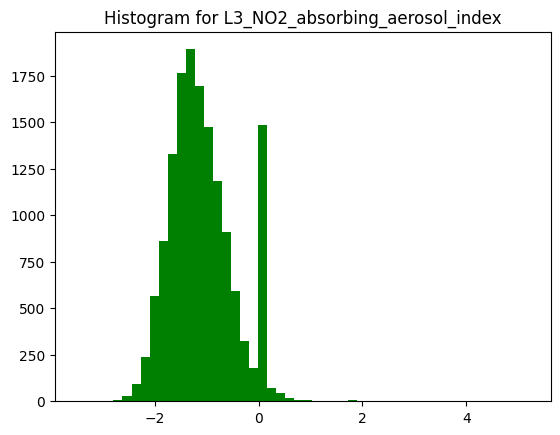

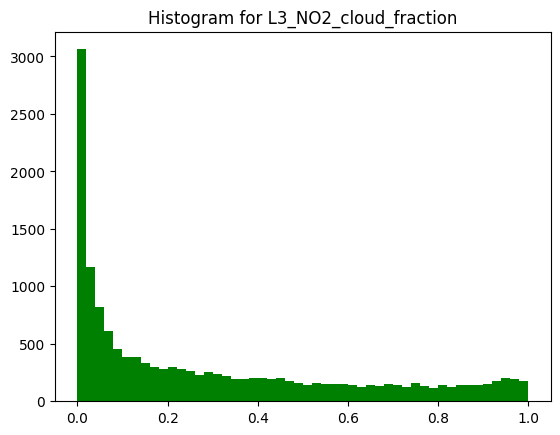

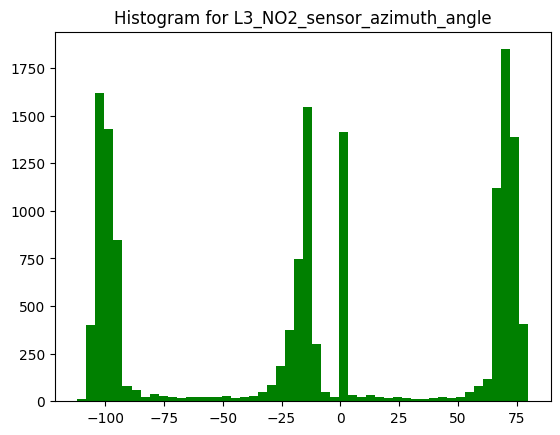

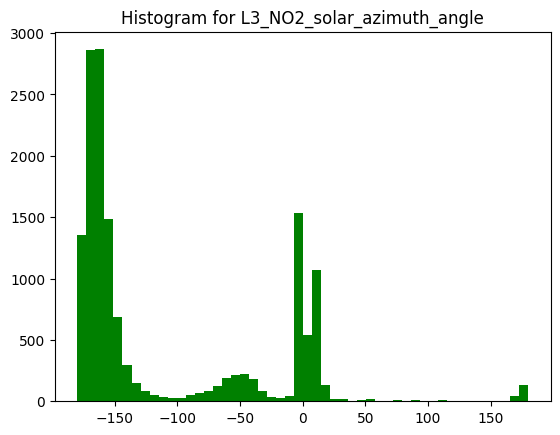

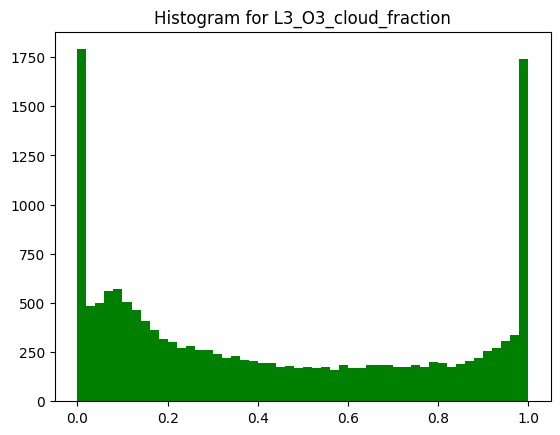

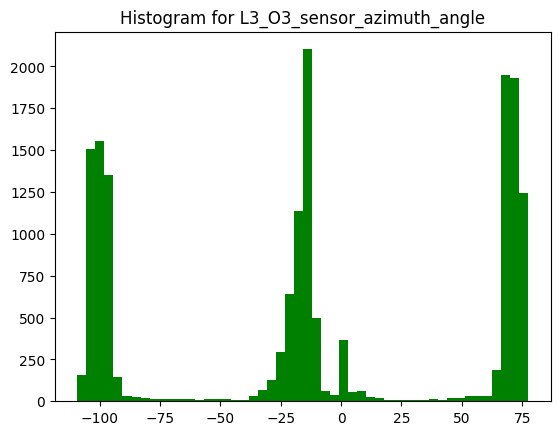

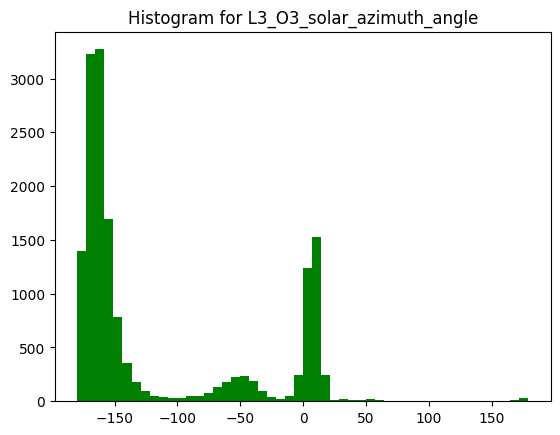

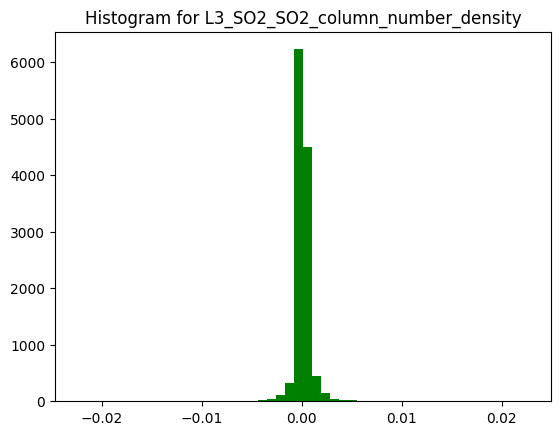

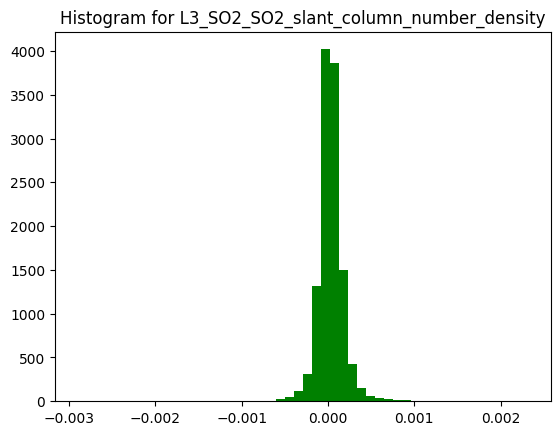

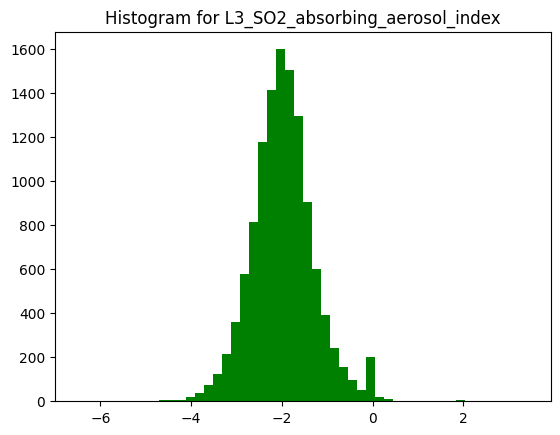

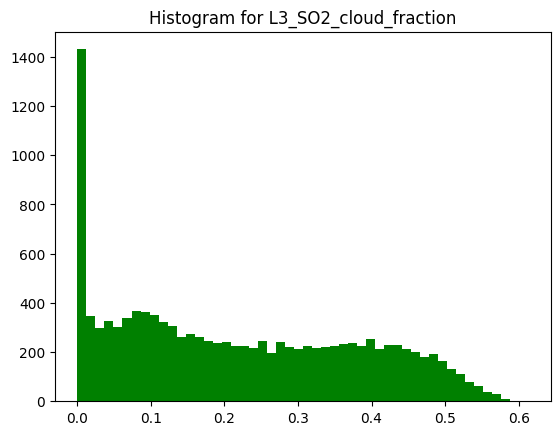

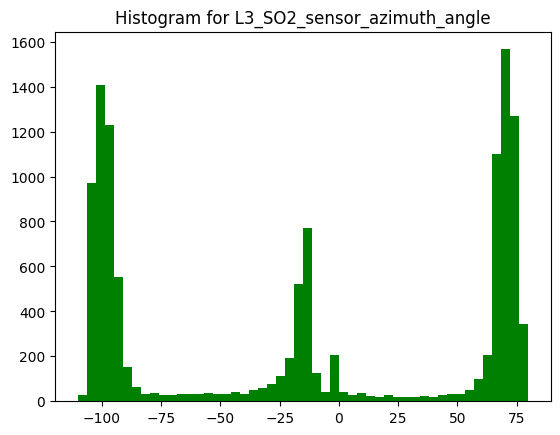

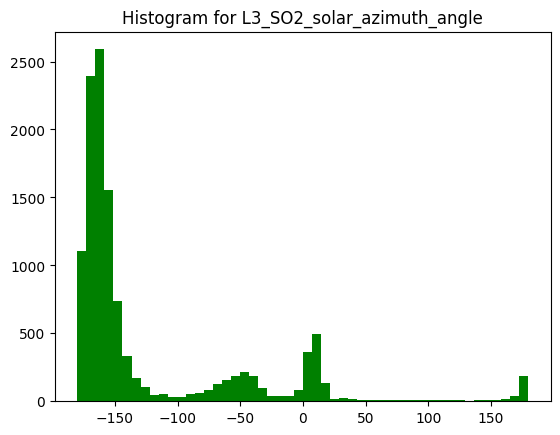

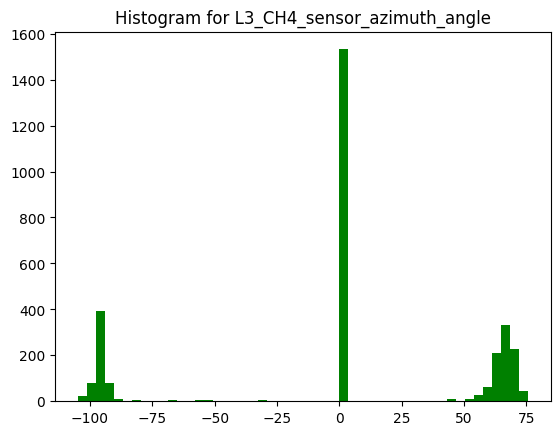

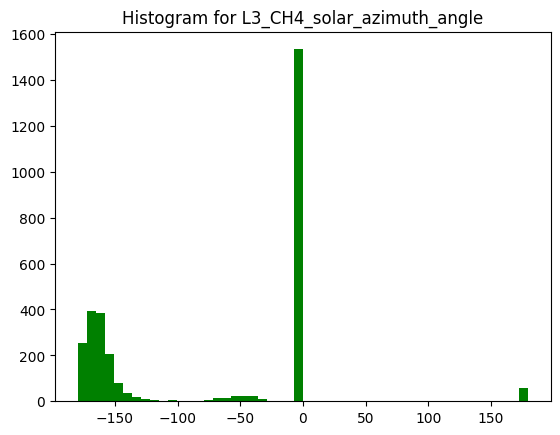

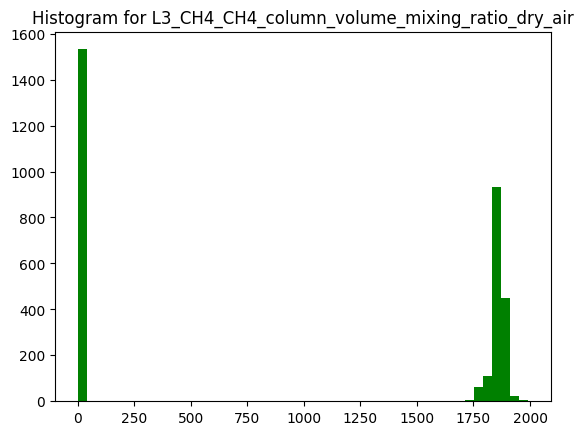

In [102]:
col_plotter_with_errors(not_nomal_normal_distrubuted_cool_zero, 'green')

No errors encountered.


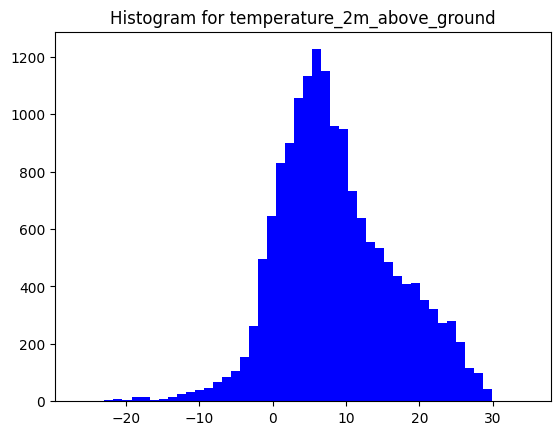

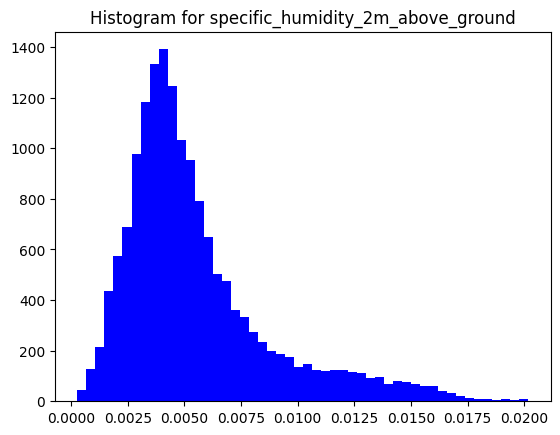

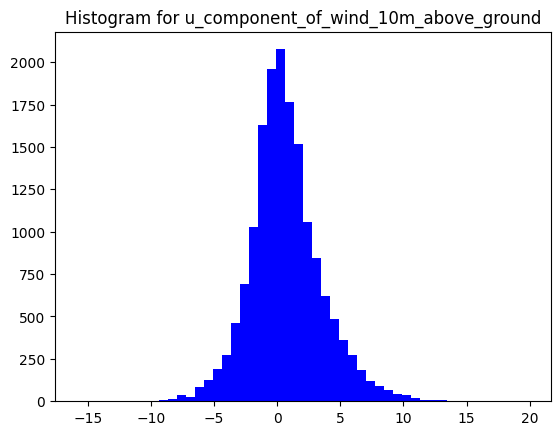

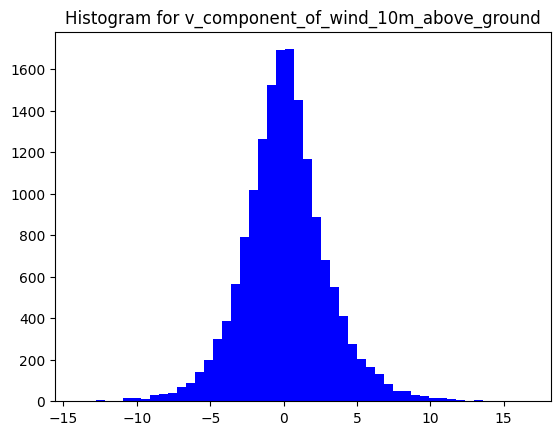

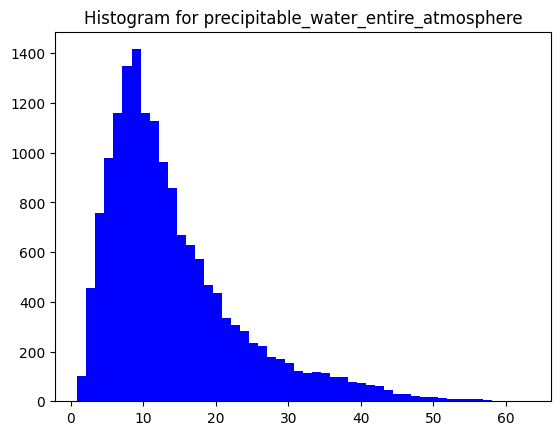

In [98]:
col_plotter_with_errors(normal_distrubuted_cool_zero, 'blue')

In [35]:
#list were zeros is not cool 

#lst_bad_zero_values = [item for item in zero_count.keys() if item in lst_zero_is_cool]
#lst_bad_zero_values == zero_count.keys()

lst_bad_zero_values = []

for item in list(zero_count.keys()):
    if item not in lst_zero_is_cool:
        lst_bad_zero_values.append(item)


lst_bad_zero_values

['L3_CH4_solar_zenith_angle',
 'L3_CH4_sensor_zenith_angle',
 'L3_CH4_aerosol_optical_depth',
 'L3_CH4_aerosol_height',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_sensor_altitude',
 'L3_NO2_solar_zenith_angle',
 'L3_O3_O3_effective_temperature',
 'L3_O3_O3_column_number_density',
 'L3_O3_solar_zenith_angle',
 'L3_O3_sensor_zenith_angle',
 'L3_SO2_solar_zenith_angle',
 'L3_SO2_sensor_zenith_angle',
 'L3_SO2_SO2_column_number_density_amf',
 'L3_HCHO_solar_zenith_angle',
 'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
 'L3_HCHO_sensor_zenith_angle',
 'L3_CO_sensor_zenith_angle',
 'L3_CO_sensor_altitude',
 'L3_CO_solar_zenith_angle',
 'L3_CLOUD_surface_albedo']

/var/folders/wp/gjgrnkqd0mq5nfzdmnd4yvl80000gn/T/ipykernel_80079/3164332297.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


No errors encountered.


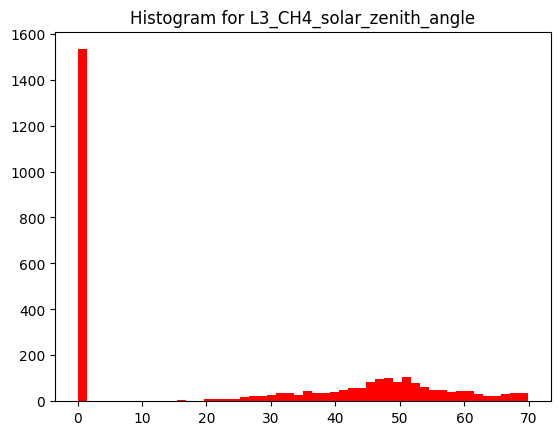

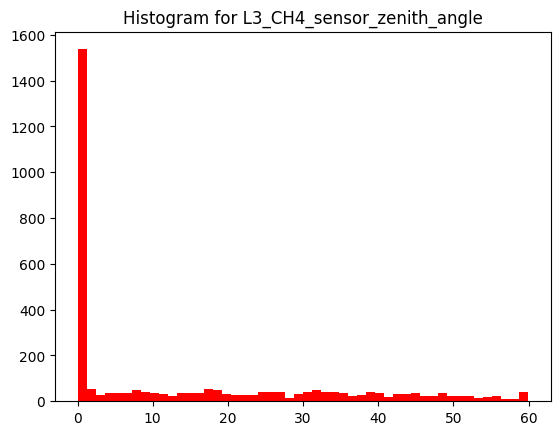

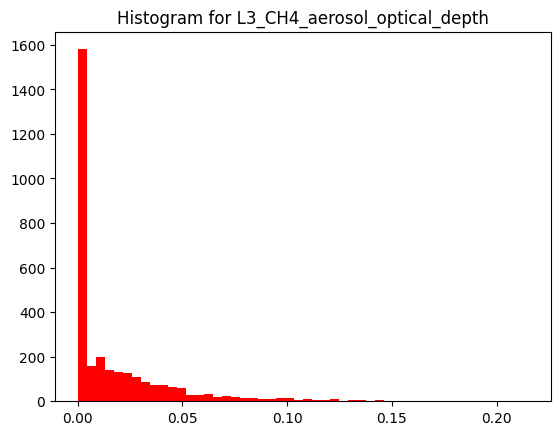

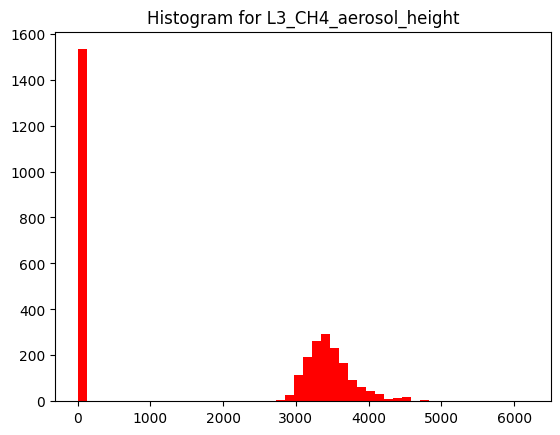

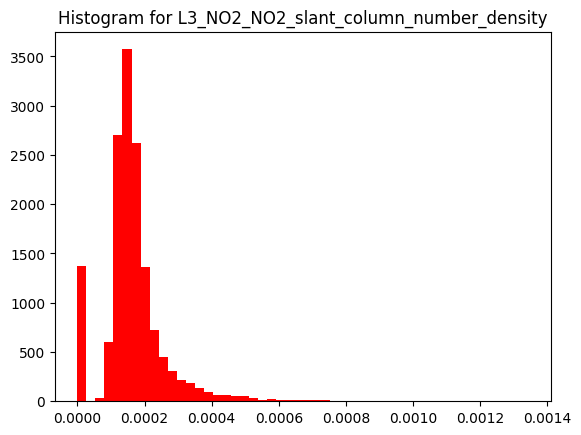

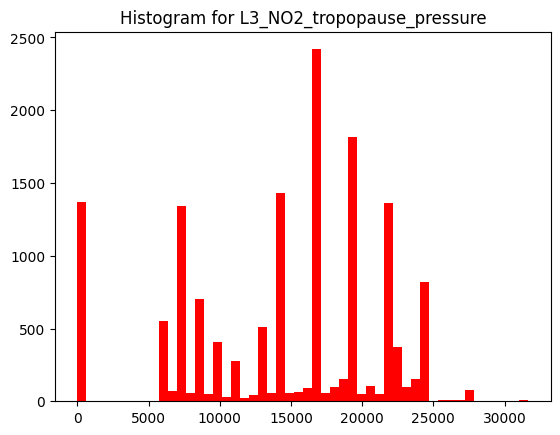

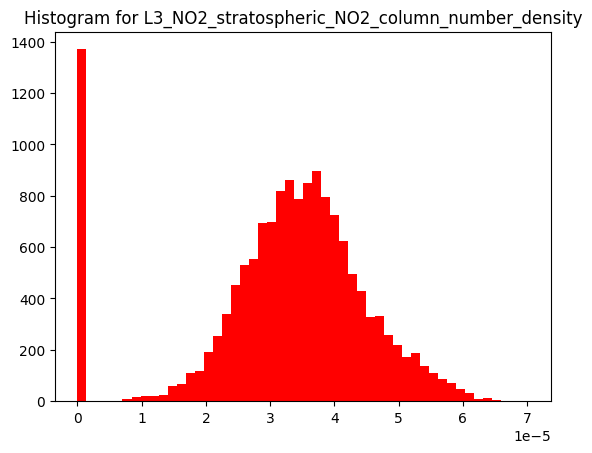

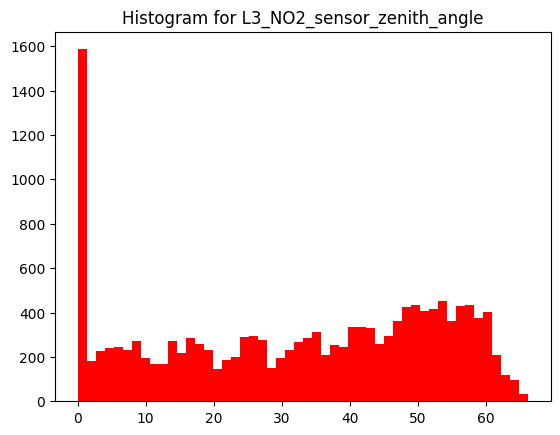

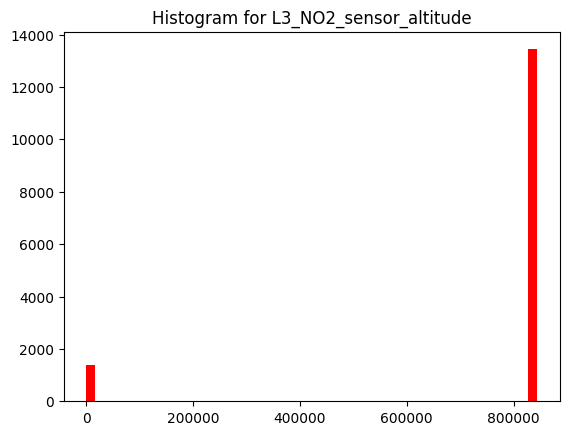

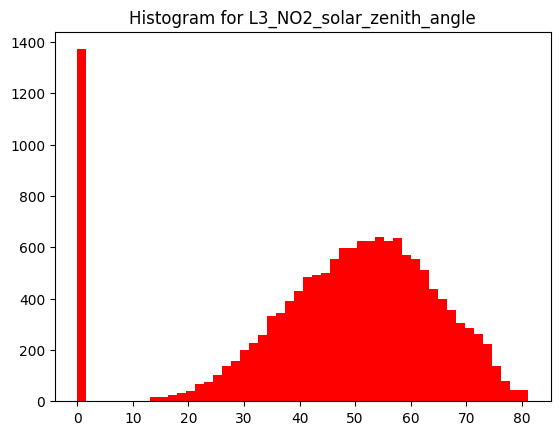

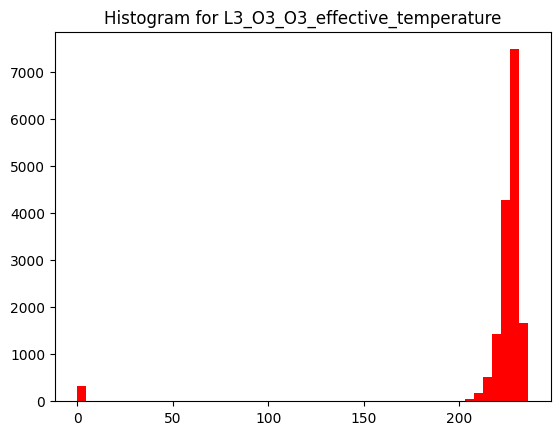

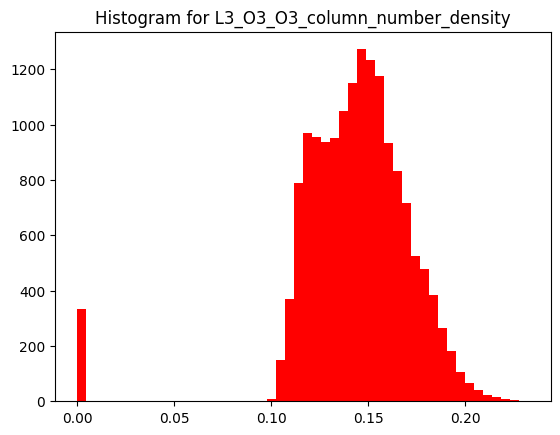

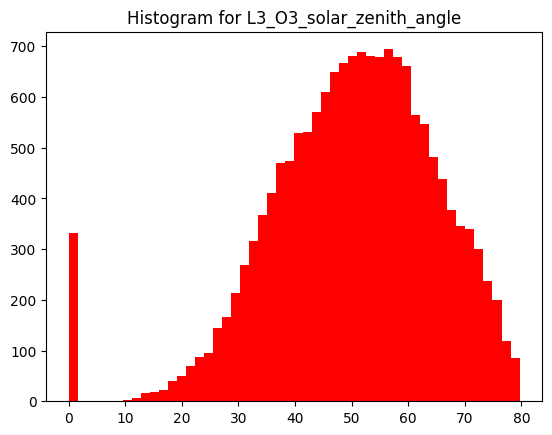

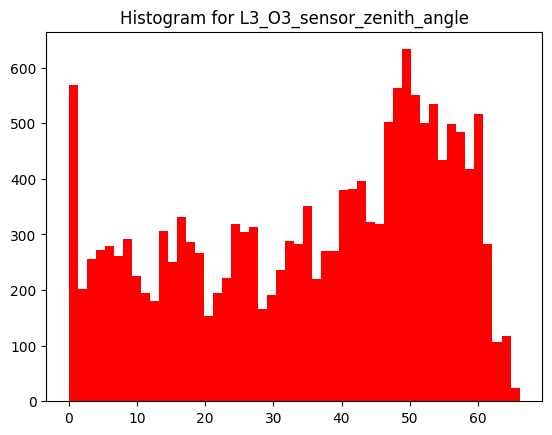

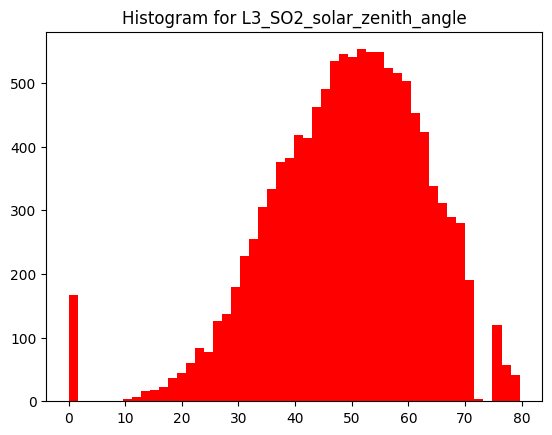

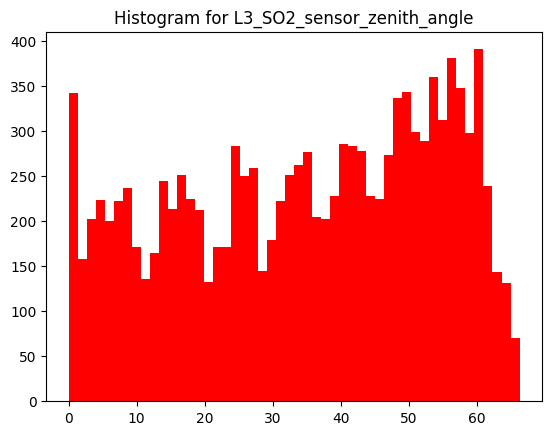

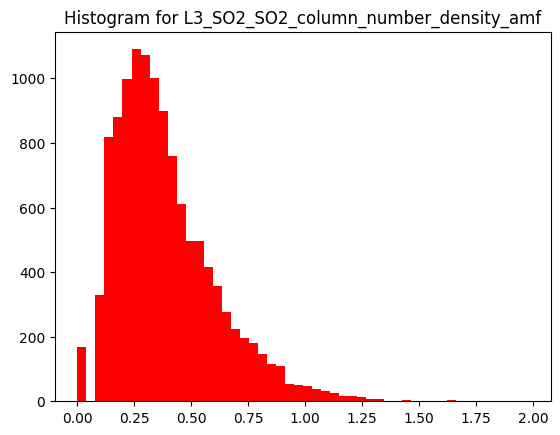

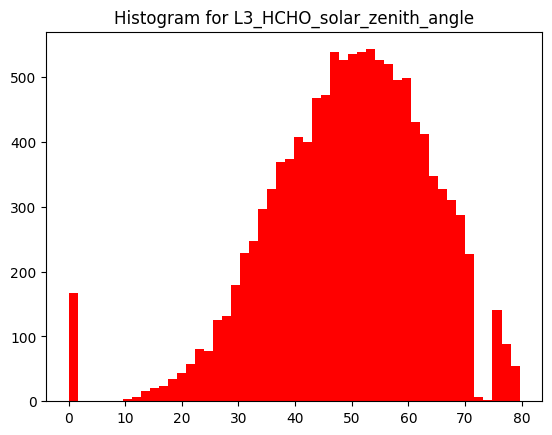

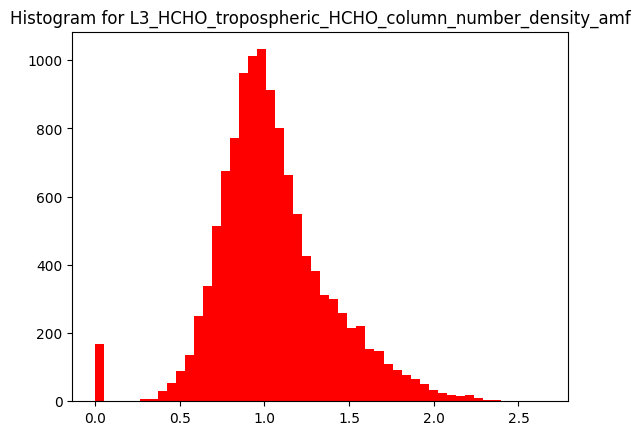

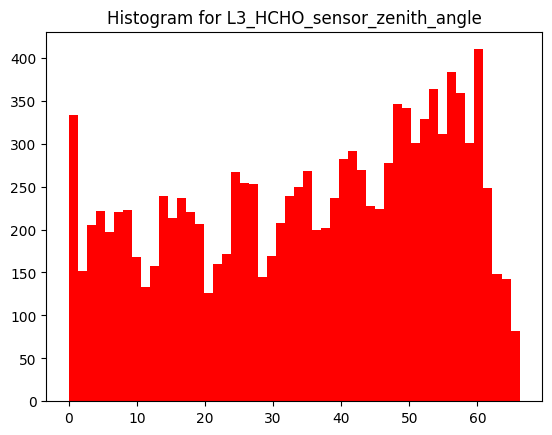

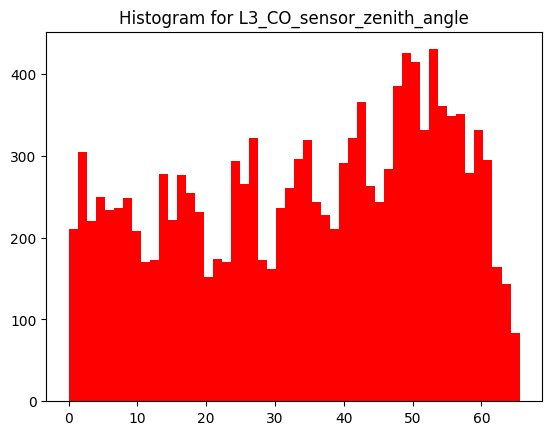

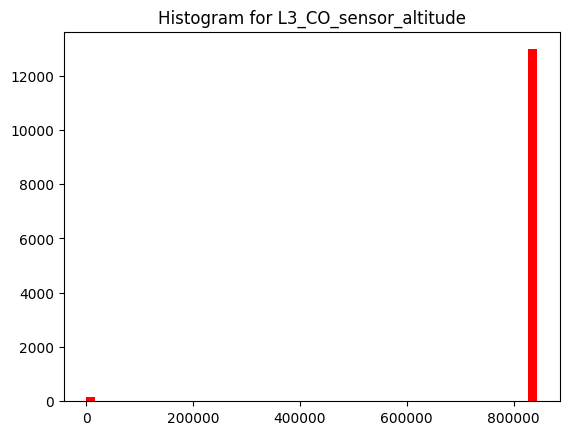

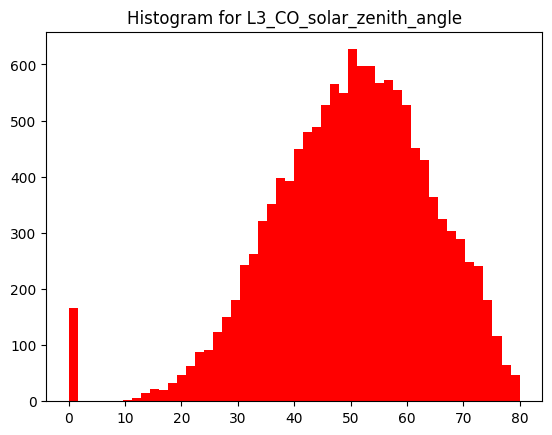

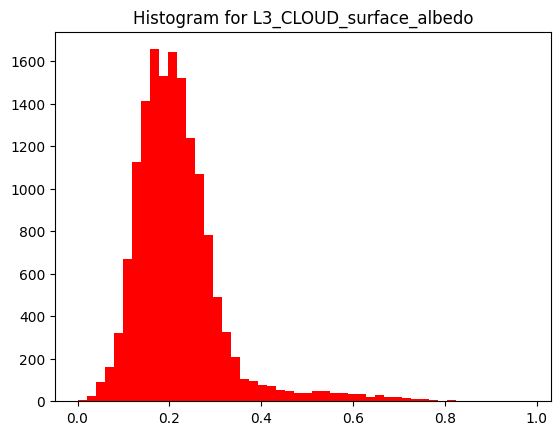

In [22]:
# To plot the whole whole lst_zero_is_cool
errors_zero_not_cool = []

for col_name in lst_bad_zero_values: 
    try:
        plt.figure()
        n_bins = int (2*(len(test[col_name])**(1/3))) # n bin according to rice rule: 2 * n^(1/3),
        plt.hist(test[col_name],bins=n_bins, label=col_name, color='red')
        plt.title(f'Histogram for {col_name}')
    except Exception as e:
            errors_zero_not_cool.append(f"Error processing item {col_name}: {e}")
            continue  # Continue the loop to the next iteration


if errors_zero_not_cool:
    print("Errors encountered:")
    for error in errors_zero_not_cool:
        print(error)
else:
    print("No errors encountered.")
